In [3]:
%load_ext autoreload

In [18]:
%autoreload 2

import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import h5py
from mintpy.utils import readfile, utils as ut 
from scipy import stats
import matplotlib.dates as mdates
from mintpy.objects import timeseries
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mintpy.utils import plot as pp
import matplotlib.ticker as mticker


input lat / lon: 35.866 / -121.4294
corresponding y / x: 338 / 1406


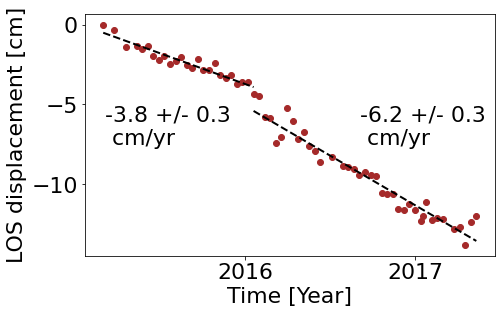

In [5]:


project_dir = './../DATA/Mudcreek_data'
tsStack_minopy = project_dir + '/timeseries_SET_ERA5_demErr.h5'
gStack_minopy = project_dir + '/geometryRadar.h5'
out_dir = './out_figures'


ref_lat = 35.9022
ref_lon = -121.4523

coord = (35.866, -121.4294)

dates_minopy, ts_minopy, ts_std = ut.read_timeseries_lalo(coord[0], coord[1], tsStack_minopy, 
                                                  lookup_file=gStack_minopy, ref_lat=ref_lat, ref_lon=ref_lon,
                                                  win_size=2, unit='cm', print_msg=True)

ind = list(dates_minopy).index(datetime.datetime.strptime('20160131', '%Y%m%d'))
xx = [(x-dates_minopy[0]).days for x in dates_minopy]

res1 = stats.linregress(xx[0:ind], ts_minopy[0:ind])
res2 = stats.linregress(xx[ind::], ts_minopy[ind::])
#res.intercept + res.slope * np.array(x_mintpy)


plt.rcParams["font.size"] = "22"

fig = plt.figure(figsize=(15, 12), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.02, right=0.4, top=0.98, bottom=0.7,
                        hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(gs1[0,0])
ax1.plot(dates_minopy, ts_minopy, 'o', color='brown')
#ax1.errorbar(dates_minopy, ts_minopy, yerr=ts_std, fmt='-',capsize=4, color='brown', linewidth=2)

ax1.plot(dates_minopy[0:ind], res1.intercept + res1.slope * np.array(xx[0:ind]), 'k--', linewidth=2)
ax1.plot(dates_minopy[ind-1::], res2.intercept + res2.slope * np.array(xx[ind-1::]), 'k--', linewidth=2)

ax1.text(datetime.datetime.strptime('20150305', '%Y%m%d'), -7.5, '{:.1f} +/- {:.1f}\n cm/yr'.format(res1.slope*365.25, res1.stderr*365.25))
ax1.text(datetime.datetime.strptime('20160905', '%Y%m%d'), -7.5, '{:.1f} +/- {:.1f}\n cm/yr'.format(res2.slope*365.25, res2.stderr*365.25))


years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.set_xlabel('Time [Year]')

ax1.set_ylabel('LOS displacement [cm]')
#plt.savefig('mudcreek.eps', bbox_inches='tight', transparent=True)
#plt.savefig(out_dir + '/mudcreek_ts.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [10]:
project_dir = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42'
out_dir = './out_figures'
#os.chdir(project_dir)

out_amplitude = project_dir + '/mean_amplitude'

reflat = 35.9022
reflon = -121.4523


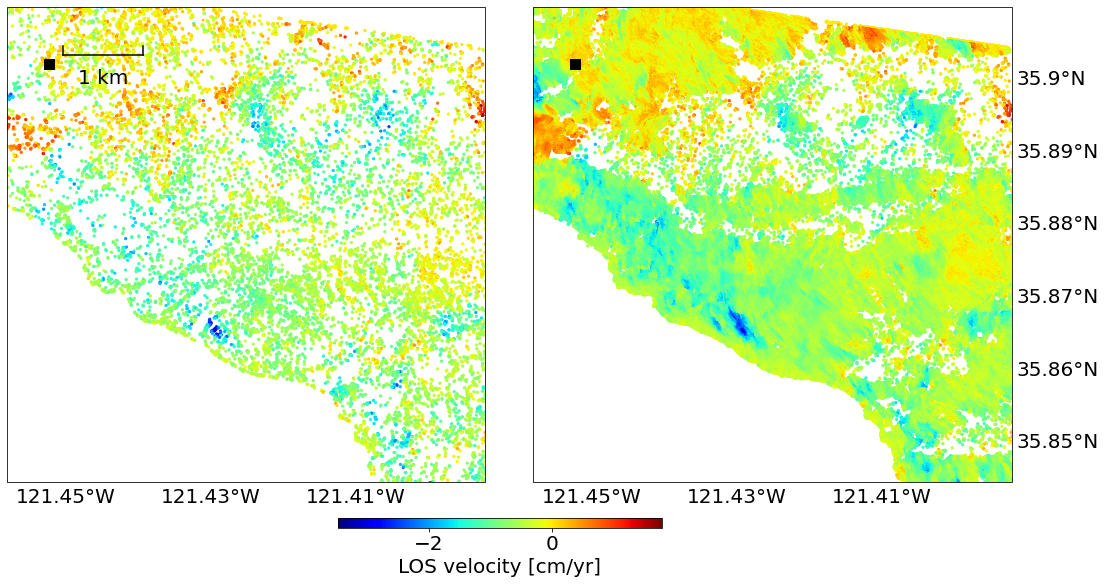

In [31]:
plt.rcParams["font.size"] = "20"


factor = [1.5]

geom_mud2 = project_dir + '/geometryRadar.h5'
data_mud2 = project_dir + '/velocity.h5'
mask_tem_file = project_dir + '/maskTempCoh.h5'
mask_ps_file = project_dir + '/maskPS.h5'
watermask_file = project_dir + '/waterMask.h5'
tcoh_file = project_dir + '/temporalCoherence.h5'

latitude = readfile.read(geom_mud2, datasetName='latitude')[0]
longitude = readfile.read(geom_mud2, datasetName='longitude')[0]
velocity = readfile.read(data_mud2, datasetName='velocity')[0]*100
mask_w = readfile.read(watermask_file, datasetName='mask')[0]
tempCoh = readfile.read(tcoh_file, datasetName='temporalCoherence')[0]*mask_w
mask_t = mask_w
mask_t[tempCoh<0.6] = 0

mask_t = readfile.read(mask_tem_file, datasetName='mask')[0]*mask_w
mask_p = readfile.read(mask_ps_file, datasetName='mask')[0]*mask_w


fig, axs = plt.subplots(nrows=1, ncols=2, 
                        figsize=(18,13), subplot_kw=dict(projection=ccrs.PlateCarree()))


mask = mask_t
## Plot Pichincha

box = ['35.8445:35.9100','-121.4580:-121.3921']
#box = ['25.85:25.90','-80.144:-80.118']


lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())

im=ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=5, cmap='jet') #, vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat, marker="s", color='black', s=100); 

#cbar_top = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.28, pad=0.08) #, cax=cax_top)
#cbar_top.set_ticks([-1, 0, 1])
#cbar_top.set_label('cm/y')


gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-80.13])
#gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


ax = axs[0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
mask = mask_p
ax.scatter(longitude[mask==1], latitude[mask==1], 
           c=velocity[mask==1], s=5, cmap='jet') #, vmin=-1.2, vmax=1.2); 

ax.scatter(reflon, reflat,marker="s", color='black', s=100); 

geo_box = (lon[0], lat[0], lon[1], lat[1])
pp.draw_scalebar(ax, geo_box, unit='degrees', loc=[0.2, 0.2, 0.1], labelpad=0.05, color='k', font_size=20)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-80.13])
#gl.ylocator = mticker.FixedLocator([25.88, 25.89])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


cbar_ax = fig.add_axes([0.38, 0.2, 0.25, 0.01])
fig.colorbar(im, cax=cbar_ax, label='LOS velocity [cm/yr]', orientation='horizontal')

fig.subplots_adjust(hspace=0.1, wspace=0.1)


#plt.savefig(out_dir +'/mudcreek_map_PSDS.png', bbox_inches='tight', dpi=300) 
plt.show()